In [ ]:
! pip install geopandas
!!pip install cartopy
! pip install --no-binary shapely shapely --force

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import cartopy
from cartopy.io import shapereader
import cartopy.crs as ccrs
import geopandas
import numpy as np

In [3]:
# get natural earth data (http://www.naturalearthdata.com/)
# get country borders
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'
shpfilename = shapereader.natural_earth(resolution, category, name)
# read the shapefile using geopandas
df = geopandas.read_file(shpfilename)

/usr/local/lib/python3.7/dist-packages/cartopy/feature/__init__.py:217: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self._geoms = tuple(geometries)
/usr/local/lib/python3.7/dist-packages/cartopy/feature/__init__.py:217: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  self._geoms = tuple(geometries)
/usr/local/lib/python3.7/dist-packages/cartopy/feature/__init__.py:217: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self._geoms = tuple(geometries)
/usr/local/lib/python3.7/dist-packages/cartopy/feature/__init__.py:217: Sh

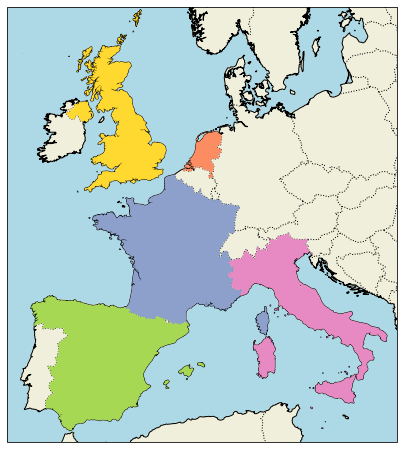

In [28]:
# Set up the canvas
fig = plt.figure(figsize=(8, 8))
central_lon, central_lat = 0, 45
extent = [-10, 18, 35, 60]
ax = plt.axes(projection=cartopy.crs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)

# Add natural earth features and borders
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', alpha=1)
ax.add_feature(cartopy.feature.OCEAN, facecolor=("lightblue"))
ax.add_feature(cartopy.feature.LAND)
ax.coastlines(resolution='10m')



# Insert your lists of countries and lag times here
countries = ['Netherlands', 'France', 'Italy', 'Spain','United Kingdom']
lags = [1,2 ,3, 4,5]
# Normalise the lag times to between 0 and 1 to extract the colour
lags_norm = (lags-np.nanmin(lags))/(np.nanmax(lags) - np.nanmin(lags))


# Choose your colourmap here
cmap = matplotlib.cm.get_cmap('Set2')
for country, lag_norm in zip(countries, lags):
    # read the borders of the country in this loop
    poly = df.loc[df['ADMIN'] == country]['geometry'].values[0]
    # get the color for this country
    rgba = cmap(lag_norm)
    # plot the country on a map
    ax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor=rgba, edgecolor='none', zorder=1)
fig.savefig('Location.jpeg' ,dpi=200)
fig.savefig('Location.png' ,dpi=200)